In [ ]:
import matplotlib.pyplot as plt

#1o passo: Importando o Pandas e lendo o arquivo csv

- atribuição da leitura a uma variavel "notas" 
- lendo as primeiras 5 informações

In [ ]:
import pandas as pd 
notas = pd.read_csv('ratings.csv')

notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


#2o agora vamos trocar os nomes das colunas para o português para melhor entendimento do dataframe

In [ ]:
notas.columns = ['usuarioId', 'filmeId', 'nota', 'momento']
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


#3o Vamos ver o quanto as notas variam, isso é, do mínimo até o máximo

In [ ]:
notas['nota'].unique()


array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

#4o Para saber quantas vezes as notas aparecem

In [ ]:
notas['nota'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

#5o Tirar a média das notas

In [ ]:
notas['nota'].mean()

3.501556983616962

#6o Plotando um gráfico



<Axes: >

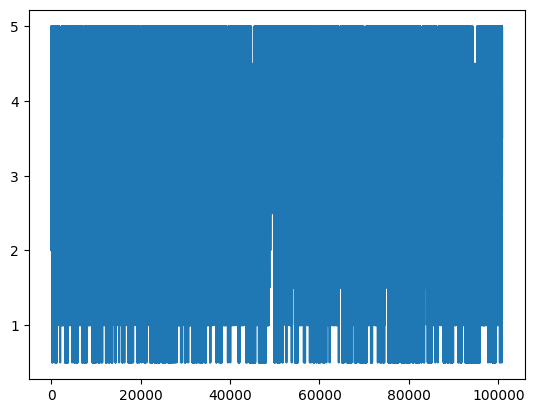

In [ ]:
notas.nota.plot()

#7o Plotando um histograma um gráfico mais legivel 

<Axes: ylabel='Frequency'>

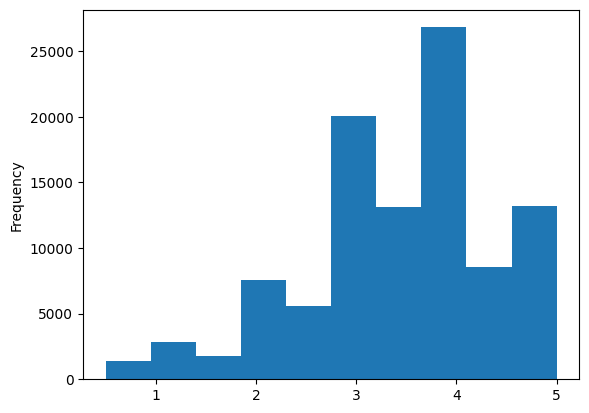

In [ ]:
notas.nota.plot(kind = 'hist')

#8o Média e Mediana

In [ ]:
print('Média:', notas['nota'].mean())
print('Mediana:', notas['nota'].median())

Média: 3.501556983616962
Mediana: 3.5


#9o Função describe(), vai descrever nosso dataframe nos dando:

- count;
- mean;
- std;
- min;
- 25%;
- 50%;
- 75%;
- max.

In [ ]:
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

#10 Vamos plotar usando o Seaborn agora outra biblioteca python

- nela é possível plotar um gráfico chamdo bloxplot que nos mostra a mediana e os outliers

<Axes: >

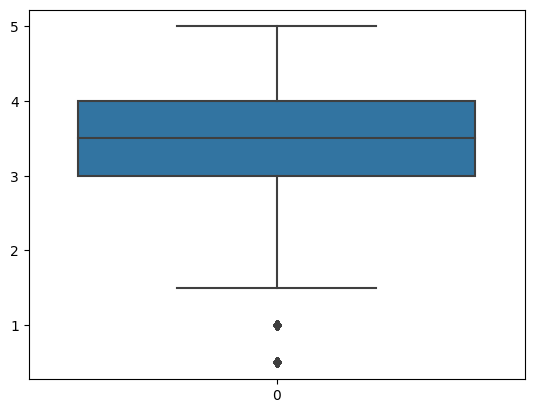

In [ ]:
import seaborn as sns

sns.boxplot(notas.nota)

#11o Agora vamos trabalhar com outro dataframe e no futuro fazer um query entre o dataframe notas que já trabalhamos e esse novo

In [ ]:
filmes = pd.read_csv('movies.csv')
filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


#Novamente vamos mudar o nome das colunas para o português

In [ ]:
filmes.columns = ['filmeId', 'titulo', 'generos']
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


#Vamos fazer nossa primeira Query

-

In [ ]:
notas.query('filmeId == 1')

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483
...,...,...,...,...
97364,606,1,2.5,1349082950
98479,607,1,4.0,964744033
98666,608,1,2.5,1117408267
99497,609,1,3.0,847221025


#Agora uma query entre o dataframe movies.csv e ratings.csv com média das notas do filme 1

In [ ]:
filme1 = notas.query('filmeId==1').nota
print(filme1)
print('A média de notas do filme 1 (Toy Story) é {}'.format(filme1.mean()))

0        4.0
516      4.0
874      4.5
1434     2.5
1667     4.5
        ... 
97364    2.5
98479    4.0
98666    2.5
99497    3.0
99534    5.0
Name: nota, Length: 215, dtype: float64
A média de notas do filme 1 (Toy Story) é 3.9209302325581397


#Seria muito dificil tirar a média de todos os filmes um por um. Por isso, vamos gerar um objeto pandas chamado DataFrameGroupBy e tirar a média

In [ ]:
mediasPorFilme = notas.groupby('filmeId').mean()['nota']
mediasPorFilme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

#E agora um histograma dessas médias

<Axes: ylabel='Frequency'>

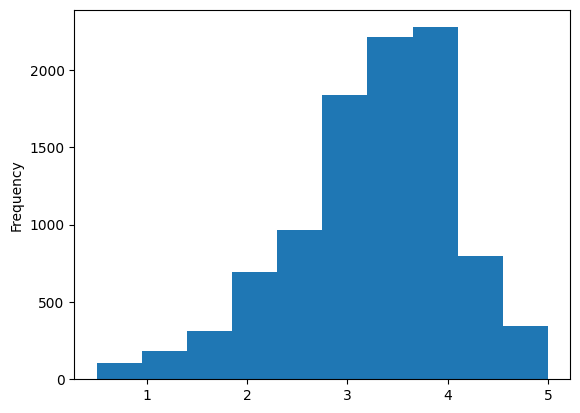

In [ ]:
mediasPorFilme.plot(kind='hist')

In [ ]:
#sns.boxplot(mediasPorFilme)

In [ ]:
mediasPorFilme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

<Axes: ylabel='nota'>

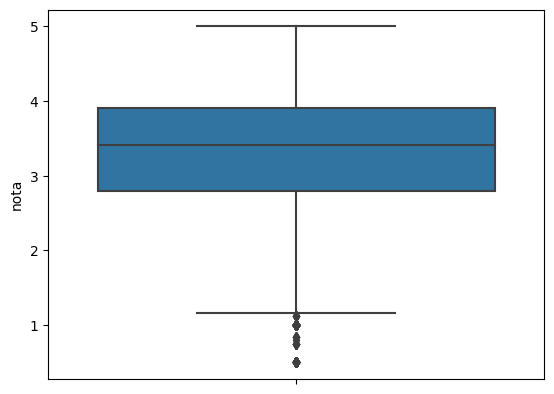

In [ ]:
sns.boxplot(y=mediasPorFilme)

In [ ]:
tmdb = pd.read_csv('tmdb_5000_movies.csv')
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [ ]:
tmdb.original_language.unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [ ]:
tmdb['original_language'].value_counts()

en    4505
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ru      11
ko      11
pt       9
da       7
sv       5
nl       4
fa       4
th       3
he       3
ta       2
cs       2
ro       2
id       2
ar       2
vi       1
sl       1
ps       1
no       1
ky       1
hu       1
pl       1
af       1
nb       1
tr       1
is       1
xx       1
te       1
el       1
Name: original_language, dtype: int64

In [ ]:
contagemDeLingua = tmdb['original_language'].value_counts().to_frame().reset_index()
contagemDeLingua.columns = ['original_language', 'total']
contagemDeLingua.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


<Axes: xlabel='original_language', ylabel='total'>

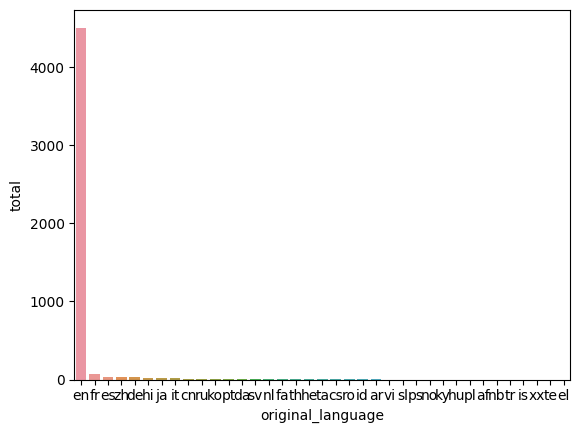

In [ ]:
sns.barplot(x='original_language',y='total', data = contagemDeLingua)

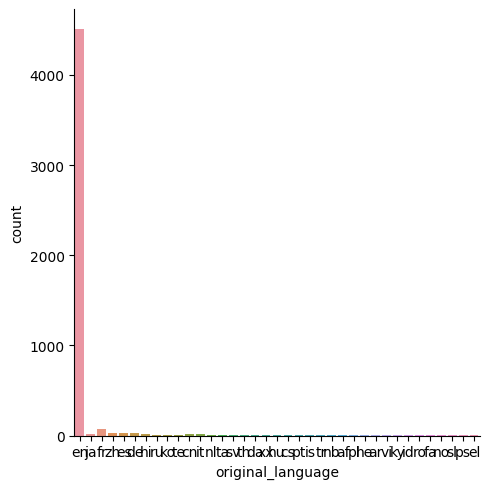

In [ ]:
sns.catplot(x = 'original_language', kind='count', data = tmdb)

In [ ]:
totalPorLingua = tmdb['original_language'].value_counts()
totalGeral = totalPorLingua.sum()
totalDeIngles = totalPorLingua.loc['en']
totalDoResto = totalGeral - totalDeIngles
print(totalDeIngles, totalDoResto)

4505 298


<Axes: xlabel='lingua', ylabel='total'>

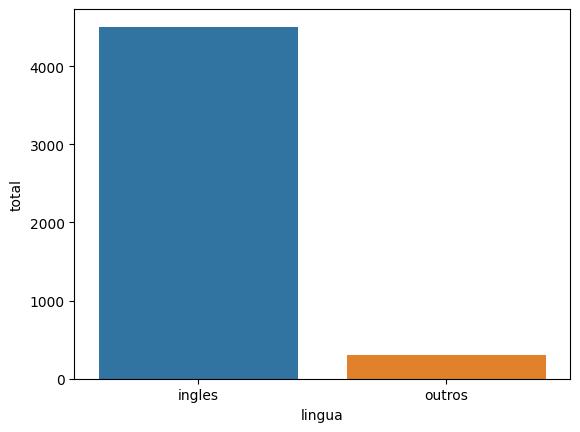

In [ ]:
dados = {
    'lingua' : ['ingles', 'outros'],
    'total' : [totalDeIngles, totalDoResto]
}

dados = pd.DataFrame(dados)
sns.barplot(data = dados, x="lingua", y="total")

In [ ]:
totalPorLinguaDeOutrosFilmes = tmdb.query("original_language != 'en'").original_language.value_counts()
totalPorLinguaDeOutrosFilmes

fr    70
es    32
zh    27
de    27
hi    19
ja    16
it    14
cn    12
ko    11
ru    11
pt     9
da     7
sv     5
fa     4
nl     4
he     3
th     3
ro     2
id     2
ar     2
cs     2
ta     2
tr     1
nb     1
af     1
pl     1
is     1
hu     1
vi     1
ky     1
xx     1
te     1
no     1
sl     1
ps     1
el     1
Name: original_language, dtype: int64

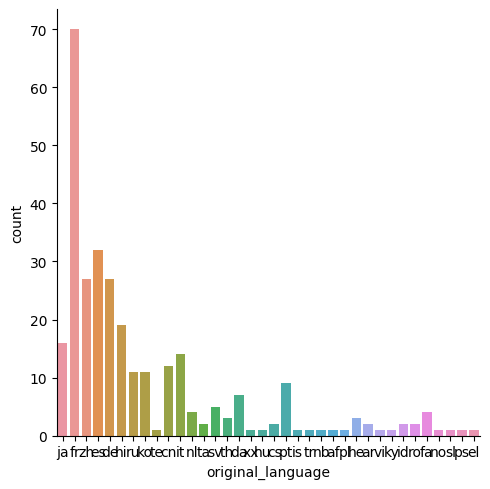

In [ ]:
filmesSemLinguaOriginalEmIngles = tmdb.query("original_language != 'en'")
sns.catplot(x = "original_language", kind="count", data = filmesSemLinguaOriginalEmIngles)

<Figure size 500x1000 with 0 Axes>

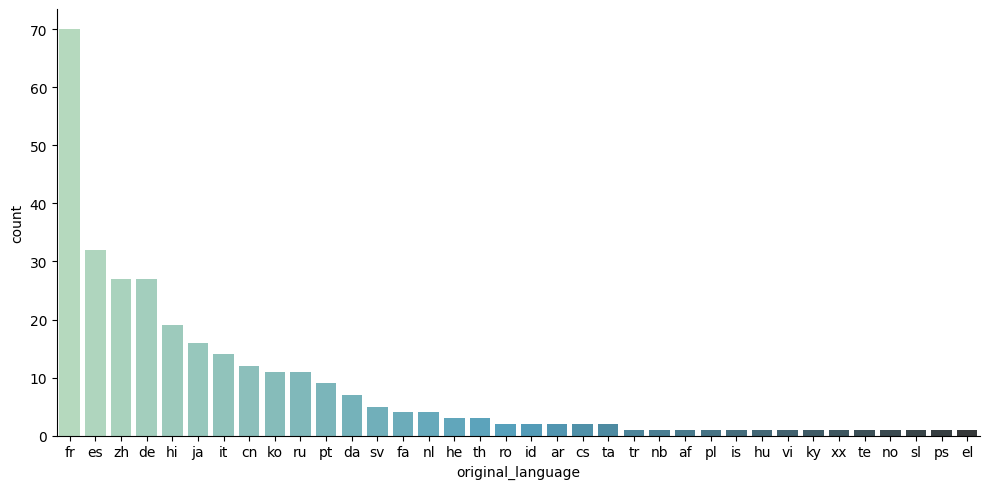

In [ ]:
plt.figure(figsize=(5,10))

sns.catplot(x = "original_language", 
            data = filmesSemLinguaOriginalEmIngles, 
            kind="count", 
            aspect=2,
            palette="GnBu_d",
            order = totalPorLinguaDeOutrosFilmes.index
            )

#Voltando a trabalhar com o dataset movies.csv

In [ ]:
filmes.head(2)

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [ ]:
#notasDoToyStory = notas.query("filmeId == 1")
#notasDoJumanji = notas.query("filmeId == 2")
#print(len(notasDoToyStory), len(notasDoJumanji))

notasDoToyStory = notas.query("filmeId==1")
notasDoJumanji = notas.query("filmeId==2")
print(len(notasDoToyStory), len(notasDoJumanji))


print("Nota média do Toy Story %.2f" % notasDoToyStory.nota.mean())
print("Nota média do Jumanju %.2f" % notasDoJumanji.nota.mean())


print("Mediana de Toy Story %.2f" % notasDoToyStory.nota.median())
print("Mediana de Jumanji %.2f" % notasDoJumanji.nota.median())

215 110
Nota média do Toy Story 3.92
Nota média do Jumanju 3.43
Mediana de Toy Story 4.00
Mediana de Jumanji 3.50


#Importando NumPy

In [ ]:
import numpy as np
#Teste
np.array([2.5] * 10).mean()

2.5

In [ ]:
filme1 = np.append(np.array([2.5] * 10), np.array([3.5] * 10))

filme2 = np.append(np.array([5] * 10), np.array([1] * 10))

In [ ]:
print(filme1.mean(), filme2.mean())

print(np.median(filme1), np.median(filme2))

3.0 3.0
3.0 3.0


(array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

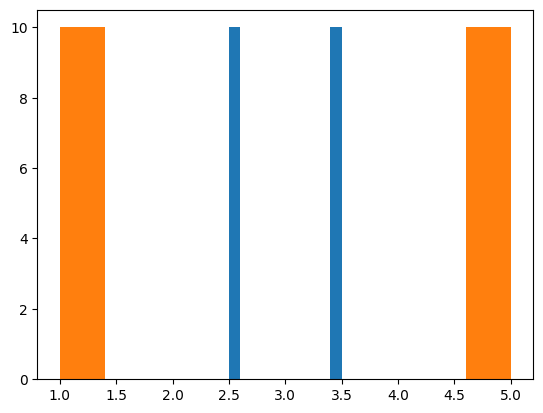

In [ ]:
plt.hist(filme1)
plt.hist(filme2)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc786383d90>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc7863801c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc786383760>,
 'medians': [<matplotlib.lines.Line2D at 0x7fc786380dc0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fc786380550>,
 'means': []}

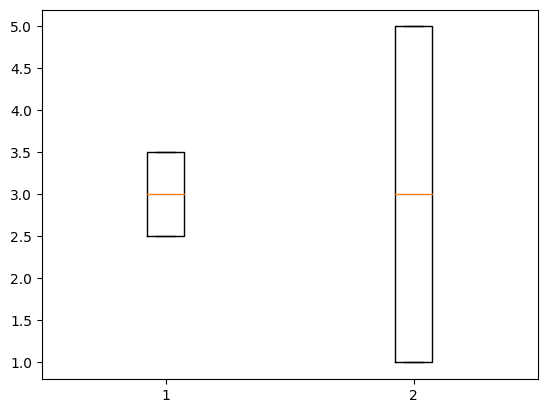

In [ ]:
plt.boxplot([filme1, filme2])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc78608dd50>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc78684f460>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc78635c460>,
 'medians': [<matplotlib.lines.Line2D at 0x7fc7865c5570>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fc7865c4d60>,
 'means': []}

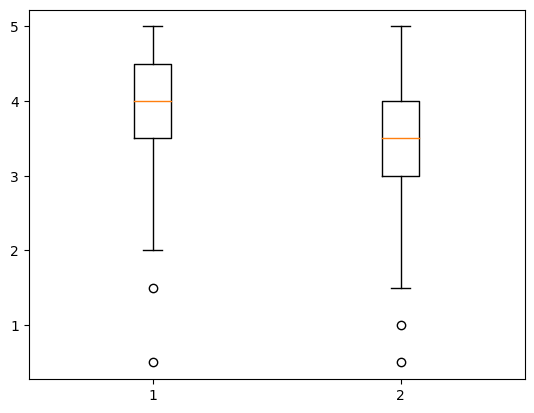

In [ ]:
plt.boxplot([notasDoToyStory.nota, notasDoJumanji.nota])